<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python</h2>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Partie 2 - Clusternig et visualisations</h2>
</div>

# Table des matières
* [Etape 1 - Importation des librairies, chargement des fichiers et définition de fonctions](#etape1)
    * [1.1 - Importation des librairies](#section1_1)
    * [1.2 - Graphiques](#section1_2)
    * [1.3 - Chargement des fichiers](#section1_3)
    * [1.4 - Définition de fonctions](#section1_4)
* [Etape 2 - Préparation des datasets](#etape2)
    * [2.1 - Files splits](#section2_1)
    * [2.2 - Scaling](#section2_2)
* [Etape 3 - Clustering hiérarchique](#etape3)
    * [3.1 - Linkage](#section3_1)
    * [3.2 - Dendrogramme](#section3_2)
    * [3.3 - Clusters](#section3_3)
* [Etape 4 - Clustering k-means](#etape4)
    * [4.1 - Nombre de clusters](#section4_1)
    * [4.2 - Méthode du coude](#section4_2)
    * [4.3 - Clusters](#section4_3)
    * [4.4 - Centroïdes et visualisations](#section4_4)
* [Etape 5 - Clustering k-means sans ACP](#etape5)

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape1"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies, chargement des fichiers et définition de fonctions</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3></a>
</div>

Importation des des librairies python nécéssaires à l'analyse préparatoire.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import metrics

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Graphiques</h3></a>
</div>

On charge seaborn :

In [2]:
sns.set()

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_3"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.3 - Chargement des données</h3></a>
</div>

In [3]:
data = pd.read_csv('dataset_synthese.csv')
data.head()

Pays        F1        F2        F3        F4        F5  \
0          Afghanistan -3.090859  1.974833 -0.277630 -0.605683 -0.639735   
1               Angola -1.214872  0.656320 -0.836246 -0.711167 -0.216757   
2              Albanie -1.163645 -0.348041  0.599185  0.099384 -0.175928   
3  Émirats Arabes Unis  3.565390 -2.597545 -1.305870 -0.326647 -0.806524   
4            Argentine  1.239784 -0.158445  0.792568  0.324074 -0.943654   

         F6        F7        F8  
0  1.405958 -0.700046 -0.855178  
1 -0.526551 -0.367370  0.454873  
2 -0.802798  0.160619  0.672468  
3  1.015719  0.103553  0.263583  
4 -0.611947  0.789682 -0.347362

In [4]:
#Dimensions du dataset
data.shape

(138, 9)

In [5]:
#Passage des noms de pays en index
df=data.set_index('Pays')
df.head()

F1        F2        F3        F4        F5  \
Pays                                                                    
Afghanistan         -3.090859  1.974833 -0.277630 -0.605683 -0.639735   
Angola              -1.214872  0.656320 -0.836246 -0.711167 -0.216757   
Albanie             -1.163645 -0.348041  0.599185  0.099384 -0.175928   
Émirats Arabes Unis  3.565390 -2.597545 -1.305870 -0.326647 -0.806524   
Argentine            1.239784 -0.158445  0.792568  0.324074 -0.943654   

                           F6        F7        F8  
Pays                                               
Afghanistan          1.405958 -0.700046 -0.855178  
Angola              -0.526551 -0.367370  0.454873  
Albanie             -0.802798  0.160619  0.672468  
Émirats Arabes Unis  1.015719  0.103553  0.263583  
Argentine           -0.611947  0.789682 -0.347362

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section1_4"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.4 - Définition de fonctions</h3></a>
</div>

In [6]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # On définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None"
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) :
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x],
                        sub_X.iloc[:, y],
                        alpha=alpha,
                        label = cluster ,
                        cmap="Set1",
                        marker=marker)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center')

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None:
        plt.legend()
    plt.show()


<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape2"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Préparation des datasets</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section2_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Files splits</h3></a>
</div>

Liste des pays

In [7]:
pays = data.Pays.values
pays[:10]

array(['Afghanistan', 'Angola', 'Albanie', 'Émirats Arabes Unis',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Belgique',
       'Bénin'], dtype=object)

In [8]:
#Isolation des valeurs
X = df.values
#Visualisation des 5 premières lignes
X[:5]

array([[-3.09085902,  1.97483334, -0.27762958, -0.60568335, -0.63973472,
         1.40595849, -0.70004628, -0.85517845],
       [-1.2148722 ,  0.6563202 , -0.83624583, -0.71116708, -0.21675666,
        -0.52655105, -0.36737   ,  0.45487285],
       [-1.16364531, -0.34804148,  0.59918497,  0.09938406, -0.17592795,
        -0.80279799,  0.16061913,  0.67246823],
       [ 3.56539   , -2.59754534, -1.30587011, -0.32664655, -0.80652446,
         1.01571946,  0.1035528 ,  0.26358311],
       [ 1.23978374, -0.15844522,  0.79256775,  0.324074  , -0.94365444,
        -0.61194693,  0.78968158, -0.34736218]])

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section2_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Scaling</h3></a>
</div>

In [9]:
std_scale = preprocessing.StandardScaler()

On l'entraine :

In [10]:
std_scale.fit(X)

StandardScaler()

Et on transforme nos données :

In [11]:
X_scaled = std_scale.transform(X)
X_scaled[:10]

array([[-1.37081974,  1.11036106, -0.27202502, -0.61093967, -0.7075396 ,
         1.98512489, -1.0597276 , -1.34954914],
       [-0.53880516,  0.36901969, -0.81936439, -0.71733881, -0.23973049,
        -0.74345694, -0.55612342,  0.7178306 ],
       [-0.51608564, -0.19568827,  0.58708912,  0.10024654, -0.19457438,
        -1.13350023,  0.24314467,  1.06121585],
       [ 1.58127788, -1.46048436, -1.27950827, -0.32948129, -0.89200722,
         1.43413194,  0.15675787,  0.41595804],
       [ 0.54985362, -0.08908671,  0.77656804,  0.32688642, -1.04367148,
        -0.86403054,  1.1954172 , -0.54816901],
       [-0.62866334,  0.02370727,  0.34373561,  0.04947623, -0.43466873,
        -0.07286524, -0.04843978,  0.08875771],
       [ 1.40506829, -1.44024311,  1.0848186 ,  0.7468631 , -0.56897462,
         1.50316807,  0.30017431, -0.08194057],
       [ 0.6036219 , -1.34985619,  0.73280982,  0.04755935,  1.508916  ,
         0.38123024, -1.09450017, -0.01923944],
       [ 1.12210223, -0.9751237 

Grace à la méthode `describe`, on confirme que la moyenne est à 0 et l'écart-type à 1:

In [12]:
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

0    1    2    3    4    5    6    7
mean  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape3"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Clustering hiérarchique</h2></a>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section3_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Linkage</h3></a>
</div>

Nous allons calculer les distances en utilisant la méthode de Ward :

In [13]:
Z = linkage(X_scaled, method="ward")
Z[:10]

array([[9.30000000e+01, 1.21000000e+02, 1.23895147e-01, 2.00000000e+00],
       [9.70000000e+01, 1.37000000e+02, 2.38474257e-01, 2.00000000e+00],
       [9.50000000e+01, 1.15000000e+02, 2.50778797e-01, 2.00000000e+00],
       [1.13000000e+02, 1.36000000e+02, 3.31928050e-01, 2.00000000e+00],
       [2.20000000e+01, 2.30000000e+01, 3.39954185e-01, 2.00000000e+00],
       [4.50000000e+01, 8.30000000e+01, 3.44344427e-01, 2.00000000e+00],
       [7.30000000e+01, 9.00000000e+01, 3.77899616e-01, 2.00000000e+00],
       [1.24000000e+02, 1.39000000e+02, 3.79234427e-01, 3.00000000e+00],
       [6.90000000e+01, 7.40000000e+01, 4.04075684e-01, 2.00000000e+00],
       [5.00000000e+00, 1.43000000e+02, 4.29557149e-01, 3.00000000e+00]])

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section3_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Dendrogramme</h3></a>
</div>

Nous pouvons désormais affichier le dendrogramme.

Notez que nous spécifions les `labels` et l'`orientation` :

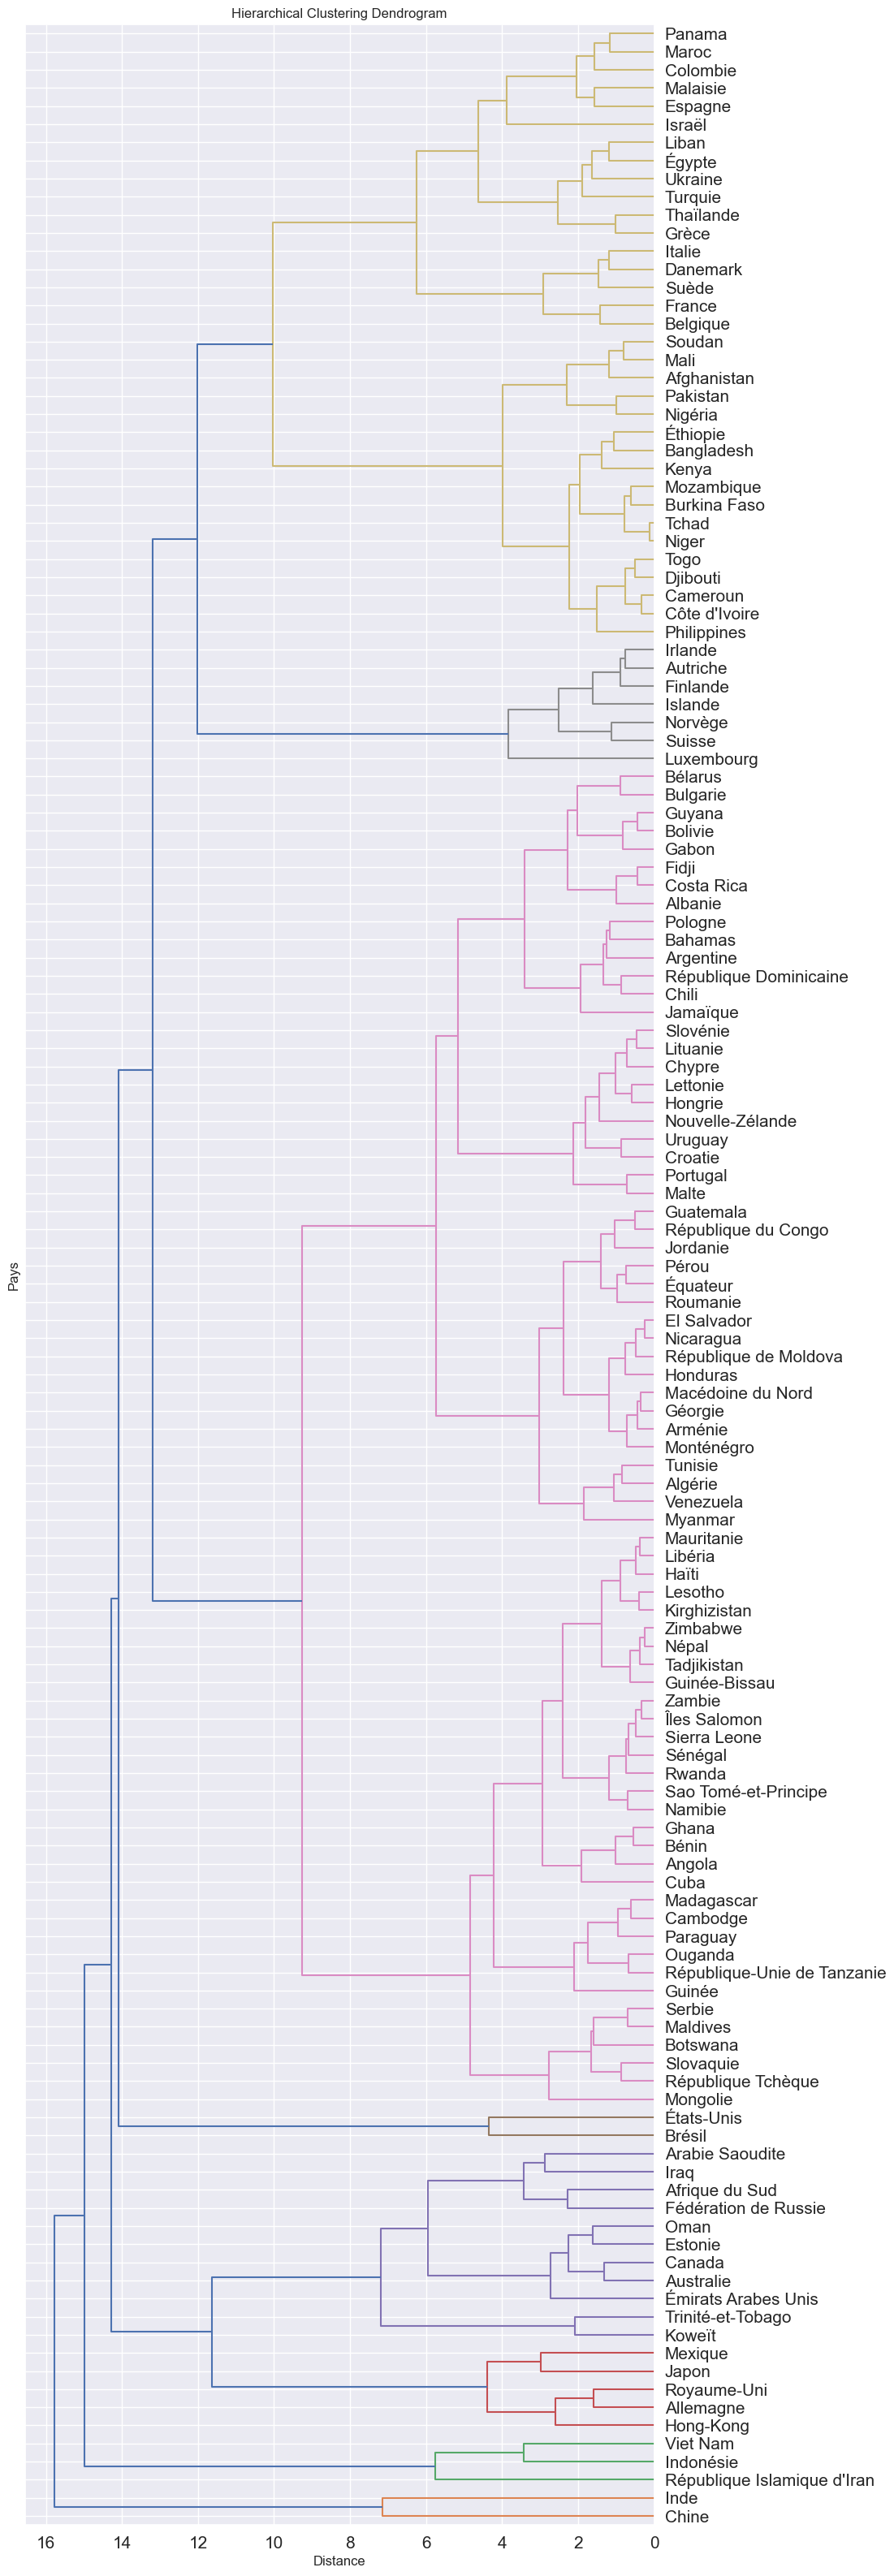

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=pays, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

plt.savefig("dendrogramme.png")

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section3_3"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Clusters</h3></a>
</div>

Ensuite, on défini le nombre de clusters que l'on souhaite:

In [15]:
k=8

On applique ensuite la fonction `fclusters`de `scipy`pour définir les clusters :

In [16]:
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([8, 6, 6, 4, 6, 6, 4, 7, 8, 6, 8, 8, 6, 6, 6, 6, 5, 6, 4, 7, 6, 1,
       8, 8, 6, 8, 6, 6, 6, 6, 3, 8, 8, 6, 6, 6, 8, 8, 4, 8, 7, 6, 8, 6,
       3, 6, 6, 6, 6, 8, 6, 6, 3, 6, 6, 6, 6, 2, 1, 7, 2, 4, 7, 8, 8, 6,
       6, 3, 8, 6, 6, 4, 8, 6, 6, 6, 7, 6, 8, 6, 6, 6, 3, 6, 8, 6, 6, 6,
       6, 8, 6, 8, 6, 8, 8, 6, 7, 6, 6, 4, 8, 8, 6, 8, 6, 6, 6, 6, 4, 6,
       4, 8, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 6, 4, 6, 8, 6, 6, 8, 6,
       5, 6, 2, 4, 6, 6], dtype=int32)

Préparation d'un dataframe avec les différents clusterings à comparer.

In [17]:
clusters=pd.DataFrame(clusters)
clusters=clusters.rename(columns={0:'cluster_hierarchique'})
clusters['Pays']=pays
clusters

cluster_hierarchique                 Pays
0                       8          Afghanistan
1                       6               Angola
2                       6              Albanie
3                       4  Émirats Arabes Unis
4                       6            Argentine
..                    ...                  ...
133                     6            Venezuela
134                     2             Viet Nam
135                     4       Afrique du Sud
136                     6               Zambie
137                     6             Zimbabwe

[138 rows x 2 columns]

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape4"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Clustering k-means</h2></a>
</div>

Nous allons effectuer un clustering avec l'algorithme du k-means.

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section4_1"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Nombre de clusters</h3></a>
</div>

Testons tout d'abord avec un nombre défini de clusters.

In [18]:
#On instancie notre estimateur:
kmeans = KMeans(n_clusters=3)

In [19]:
#On entraine
kmeans.fit(X)

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
#Calcul de l'inertie
kmeans.inertia_

856.2238821401544

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section4_2"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - Méthode du coude</h3></a>
</div>

In [21]:
#On défini d'abord une liste vide pour sotcker nos inerties:
intertia = []

In [22]:
#On défini ensuite la liste du nombre de clusters que l'on veut tester:
k_list = range(1, 14)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [23]:
#Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  intertia.append(kmeans.inertia_)

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [24]:
#Nous obtenons une liste d'inerties
intertia

[1715.1617344084914,
 1235.8124043405978,
 856.2238821401544,
 742.1158122063243,
 624.1140004149868,
 545.9755684274556,
 498.17837104776737,
 434.74087761065374,
 384.48577863361174,
 354.74489376738023,
 322.38869976300583,
 288.7140077255535,
 263.7228308608808]

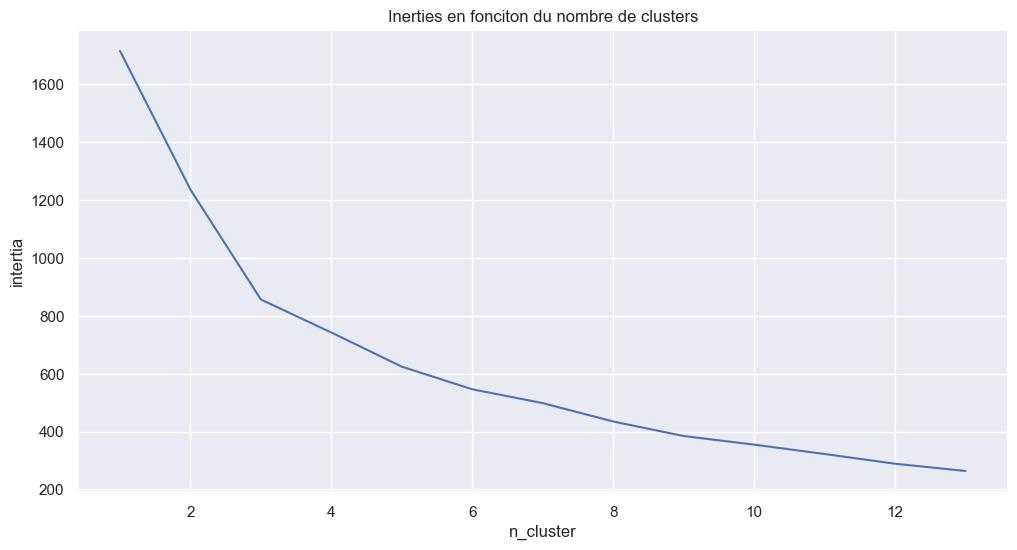

In [25]:
#Affichage du résultat
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax.set_title("Inerties en fonciton du nombre de clusters")
ax = plt.plot(k_list, intertia)

plt.savefig("inerties_clusters.png")

8 clusters suffisent à résumer les données.

In [26]:
n_clusters=8
#Nous devons d'abord ré-entrainer un estimateur:
kmeans = KMeans(n_clusters)
kmeans.fit(X)

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [27]:
#Voici les clusters
labels=kmeans.labels_
labels

array([5, 5, 0, 4, 3, 0, 1, 1, 4, 5, 5, 5, 0, 3, 0, 0, 7, 0, 1, 1, 3, 2,
       5, 5, 0, 0, 0, 0, 3, 3, 4, 5, 1, 0, 0, 0, 0, 3, 1, 5, 1, 0, 4, 0,
       4, 0, 5, 5, 5, 3, 0, 0, 4, 0, 3, 5, 3, 7, 7, 1, 6, 5, 1, 3, 3, 0,
       0, 4, 5, 5, 5, 1, 0, 5, 5, 3, 1, 3, 0, 0, 5, 0, 4, 0, 5, 3, 0, 0,
       0, 5, 5, 3, 0, 5, 5, 0, 1, 5, 1, 3, 5, 3, 0, 0, 3, 3, 5, 0, 7, 5,
       4, 5, 5, 5, 5, 0, 0, 5, 3, 3, 1, 5, 5, 0, 5, 1, 0, 0, 5, 5, 0, 3,
       2, 0, 6, 4, 5, 5])

In [28]:
#Ajout des labels à df
df['cluster'] = labels
df

F1        F2        F3        F4        F5  \
Pays                                                                    
Afghanistan         -3.090859  1.974833 -0.277630 -0.605683 -0.639735   
Angola              -1.214872  0.656320 -0.836246 -0.711167 -0.216757   
Albanie             -1.163645 -0.348041  0.599185  0.099384 -0.175928   
Émirats Arabes Unis  3.565390 -2.597545 -1.305870 -0.326647 -0.806524   
Argentine            1.239784 -0.158445  0.792568  0.324074 -0.943654   
...                       ...       ...       ...       ...       ...   
Venezuela           -0.739630  0.293449  0.327066 -0.014733 -0.806396   
Viet Nam             0.205425  1.159937 -3.681089  4.526335  1.169605   
Afrique du Sud       1.989604  0.024150 -1.351955 -0.772698 -1.023264   
Zambie              -2.011113  0.438981  0.491023 -0.233055  0.543311   
Zimbabwe            -2.143548  0.720174  0.293067 -0.200737  0.140464   

                           F6        F7        F8  cluster  
Pays                                                        
Afghanistan          1.405958 -0.700046 -0.855178        5  
Angola              -0.526551 -0.367370  0.454873        5  
Albanie             -0.802798  0.160619  0.672468        0  
Émirats Arabes Unis  1.015719  0.103553  0.263583        4  
Argentine           -0.611947  0.789682 -0.347362        3  
...                       ...       ...       ...      ...  
Venezuela            0.847683 -0.073165 -0.319306        0  
Viet Nam            -1.014359 -0.041190  0.270497        6  
Afrique du Sud       0.024584 -0.498794  0.243681        4  
Zambie              -0.516059 -0.402663  0.489281        5  
Zimbabwe             0.054099 -0.388996  0.029191        5  

[138 rows x 9 columns]

<div style="border: 1px solid RGB(0,150,250);" >
<a class="anchor" id="section4_4"><h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.4 - Centroïdes et visualisations</h3></a>
</div>

In [29]:
# Stockage nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids,
                              columns = ["F1", "F2", "F3", "F4","F5","F6","F7","F8"],
                              index=["".join(["Cluster_",str(i+1)]) for i in range(n_clusters)])
centroids

F1        F2        F3        F4        F5        F6  \
Cluster_1  -0.709604  0.054469  0.197100 -0.033550 -0.403142 -0.181773   
Cluster_2   1.930209 -2.585397  0.854706  0.350565  0.555611  0.687677   
Cluster_3  10.933371  8.547353  2.283935  0.206802  0.409114 -0.317270   
Cluster_4   0.951013 -1.159515  0.239463  0.046188  0.019257 -0.272719   
Cluster_5   3.332059 -1.053255 -2.259796 -1.165482 -0.347552 -0.121177   
Cluster_6  -2.077126  0.962233 -0.072626 -0.217584  0.188493  0.101929   
Cluster_7   0.376283  1.353089 -3.541982  6.327831  0.718121 -0.243310   
Cluster_8   2.287550  3.320673  0.431183  0.660249  0.416751  0.368243   

                 F7        F8  
Cluster_1  0.248600  0.003661  
Cluster_2 -0.307083  0.007187  
Cluster_3 -0.769940  0.191007  
Cluster_4  0.575152 -0.110795  
Cluster_5 -0.565014  0.201185  
Cluster_6 -0.337787 -0.042014  
Cluster_7 -0.094479 -0.051797  
Cluster_8  0.684986  0.402052

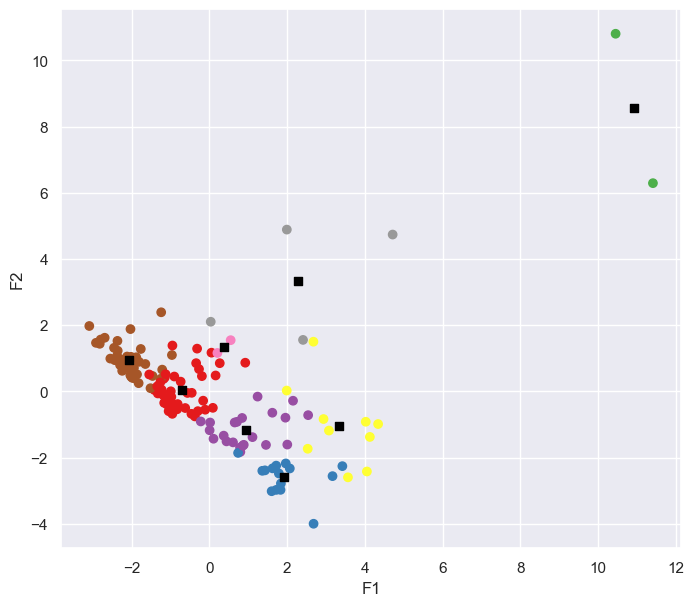

In [30]:
#Visualisation
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c= labels, cmap="Set1")
ax.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],  marker="s", c="black" )

ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.savefig("visualisation_F1_F2_centroides")

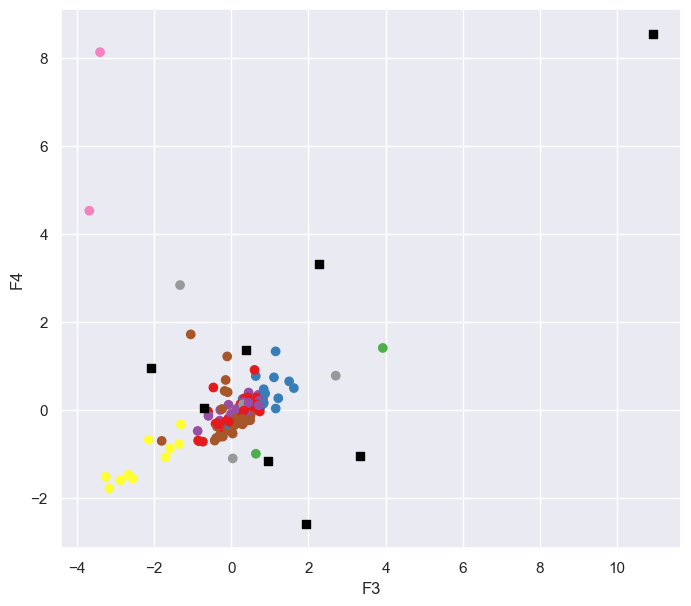

In [31]:
#Visualisation sur F3 et F4
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(df.iloc[:, 2], df.iloc[:, 3], c= labels, cmap="Set1")
ax.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],  marker="s", c="black" )

ax.set_xlabel("F3")
ax.set_ylabel("F4")
plt.savefig("visualisation_F3_F4_centroides")

C:\Users\adrie\AppData\Local\Temp\ipykernel_14740\453054836.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


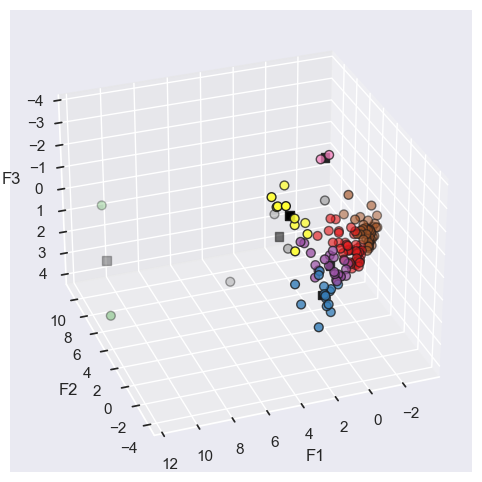

In [32]:
fig= plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    df.iloc[:, 0],
    df.iloc[:, 1],
    df.iloc[:, 2],
    c=labels,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40)

ax.scatter(
    centroids.iloc[:, 0],
    centroids.iloc[:, 1],
    centroids.iloc[:, 2],
    c="black",
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
    marker="s")

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

plt.savefig("Visualisation_F1_F2_F3")

In [33]:
fig = px.scatter_3d(x=df.iloc[:,0], y=df.iloc[:,1], z=df.iloc[:, 2],color=df.iloc[:,-1])
fig.show()

C:\Users\adrie\AppData\Local\Temp\ipykernel_14740\4074305810.py:63: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



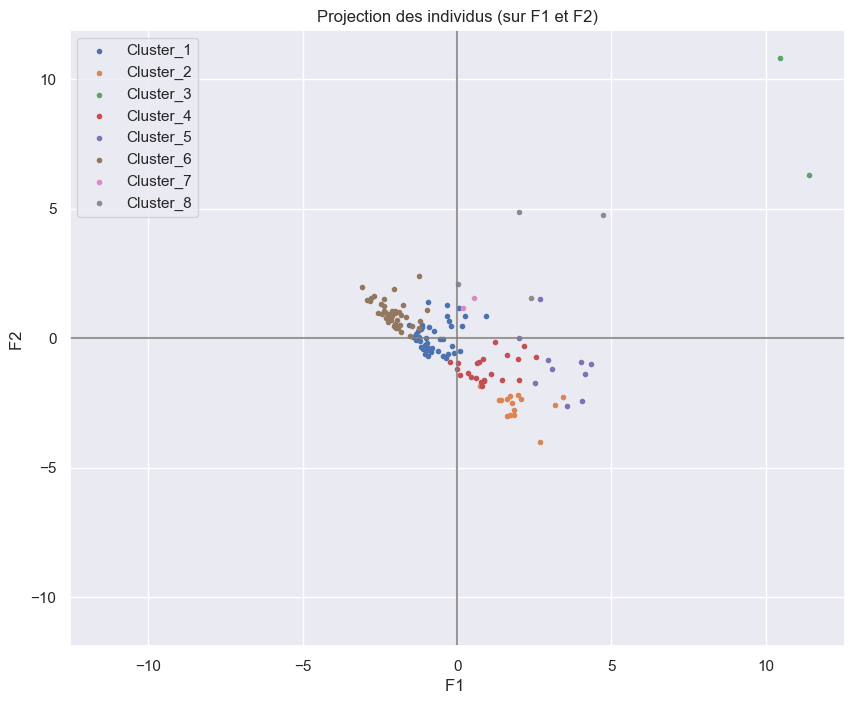

<Figure size 640x480 with 0 Axes>

In [34]:
labels_ = ["".join(["Cluster_",str(i+1)]) for i in labels]

display_factorial_planes(df,
                         x_y=(0,1),
                         clusters=labels_,
                         figsize=(10, 8),
                         alpha=1 )
plt.savefig("visualisation_F1_F2")

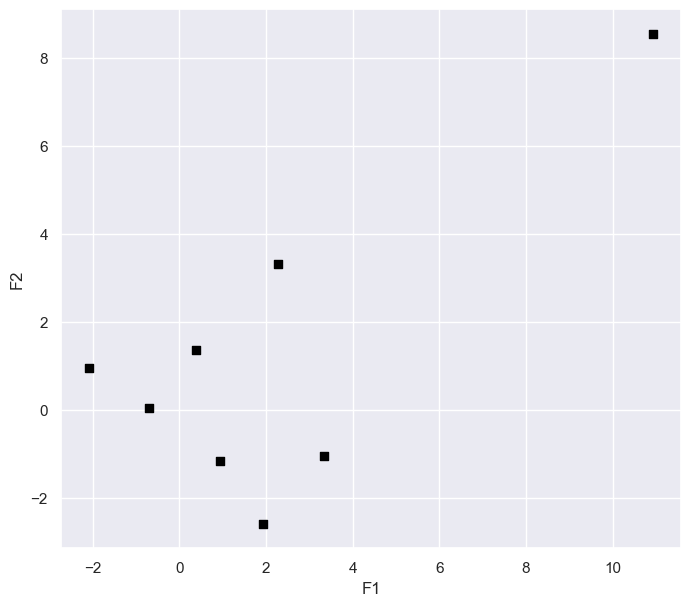

In [35]:
#Visualisation des centroïdes
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],  marker="s", c="black" )

ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.savefig("centroides_F1_F2")

In [36]:
#Projections sur les différentes dimensions avec affichage des centroïdes
#centroids_proj_affichage=centroids_proj
#centroids_proj_affichage['clusters']=['Centroïd','Centroïd','Centroïd']
#affichage_complet=df.append(centroids_proj_affichage, ignore_index = True)

#fig=sns.pairplot(affichage_complet, hue="cluster")
#fig.savefig("croisement_dimensions.png")

Export du fichier pour visualiser dans Tableau

Ajout du k-means au dataframe "clusters".

In [37]:
clusters=pd.merge(clusters,df.reset_index().loc[:,['Pays','colors']],how='left')
clusters=clusters.rename(columns={'colors':'cluster_k_means'})
clusters

cluster_hierarchique                 Pays  cluster_k_means
0                       8          Afghanistan                6
1                       6               Angola                6
2                       6              Albanie                1
3                       4  Émirats Arabes Unis                5
4                       6            Argentine                4
..                    ...                  ...              ...
133                     6            Venezuela                1
134                     2             Viet Nam                7
135                     4       Afrique du Sud                5
136                     6               Zambie                6
137                     6             Zimbabwe                6

[138 rows x 3 columns]

In [38]:
#écriture du dataframe dans un fichier csv
clusters.to_csv('clusters.csv')

Heatmap des clusters/indicateurs pour le k-means

In [39]:
#lecture des données initiales
data=pd.read_csv('dataset_nettoye.csv').set_index("Pays")
#récupération des indicateurs
indicateurs = data.columns

In [40]:
#scaling des données
data_scaled=std_scale.fit_transform(data.values)
#conversion en datarfame
data_scaled=pd.DataFrame(data_scaled)
#réincorporation des pays
data_scaled['Pays']=pays

In [41]:
#incorporation des clusters
data_clust_scaled=pd.merge(data_scaled,clusters.loc[:,['Pays','cluster_k_means']]).set_index('Pays')

In [42]:
#groupement par cluster avec la moyenne
data_clust_scaled=data_clust_scaled.groupby('cluster_k_means').mean()
#implantation des indicateurs en noms de colonnes
data_clust_scaled.columns=indicateurs

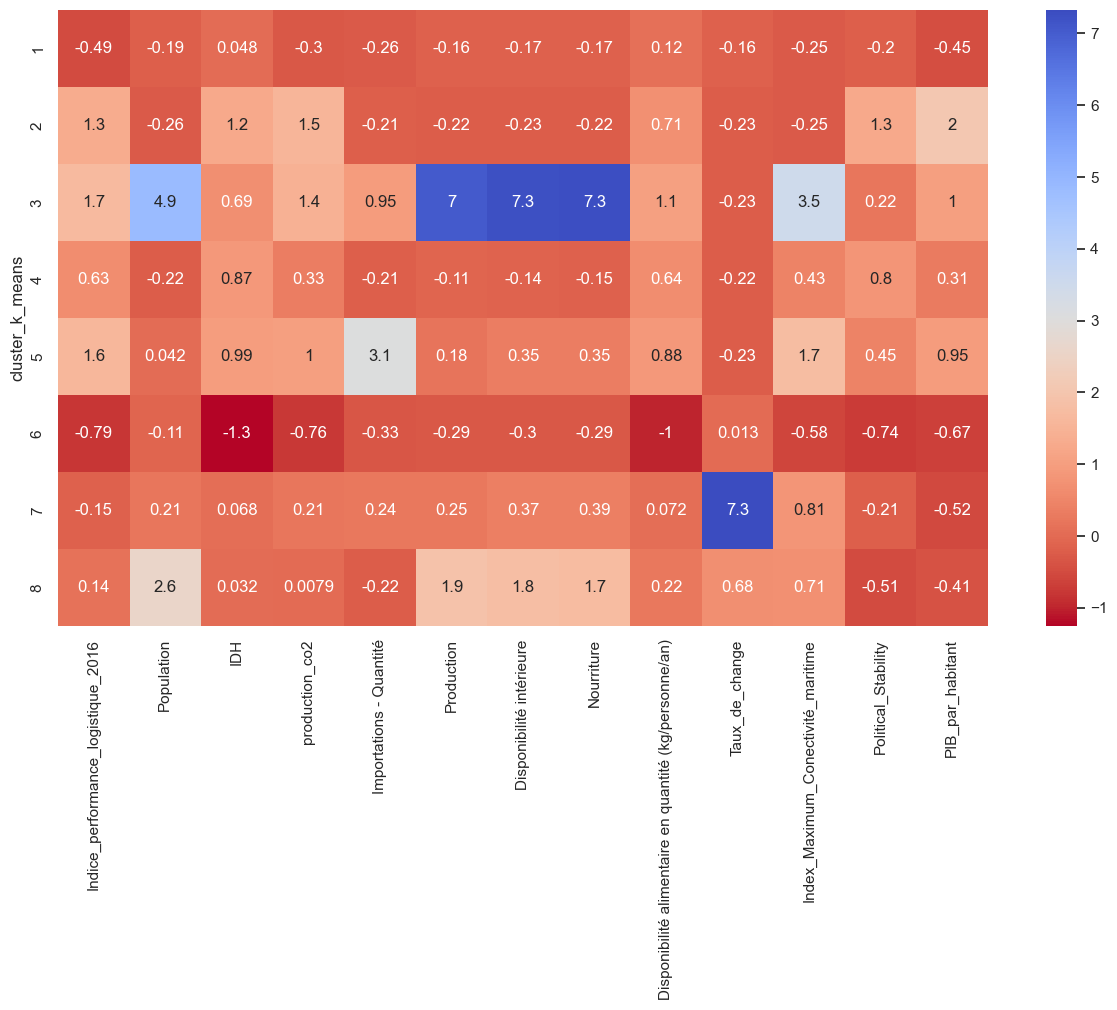

<Figure size 640x480 with 0 Axes>

In [43]:
# Afficher heatmap
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(data_clust_scaled, annot=True, cmap="coolwarm_r")
plt.show()
plt.savefig("heatmap_k_means.png")

Heatmap des clusters/indicateurs pour la classification ascnedante hiérarchique.

In [44]:
#reprise de l'étape d'incorporation des clusters
#incorporation des clusters
data_clust_scaled=pd.merge(data_scaled,clusters.loc[:,['Pays','cluster_hierarchique']]).set_index('Pays')

In [45]:
#groupement par cluster avec la moyenne
data_clust_scaled=data_clust_scaled.groupby('cluster_hierarchique').mean()
#implantation des indicateurs en noms de colonnes
data_clust_scaled.columns=indicateurs

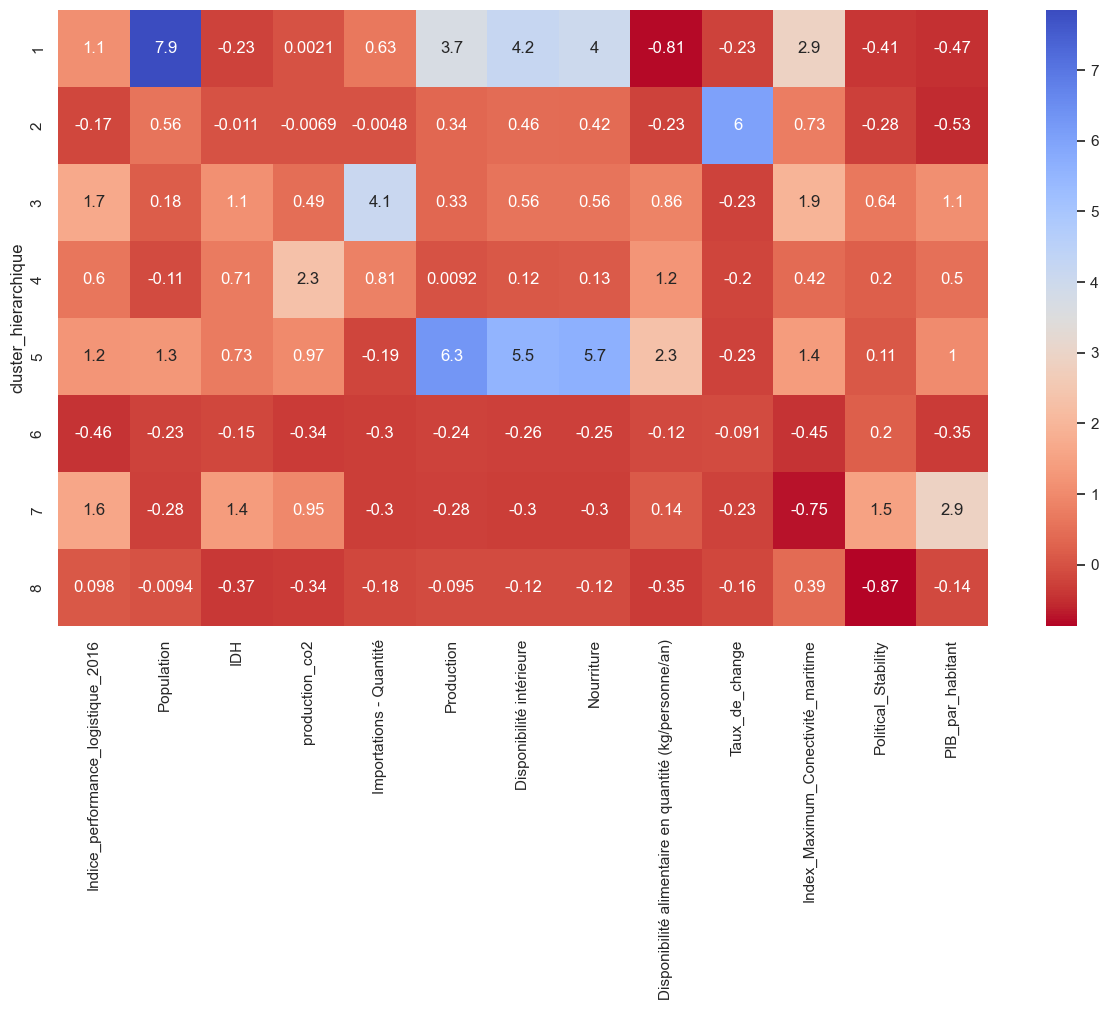

<Figure size 640x480 with 0 Axes>

In [46]:
# Afficher heatmap
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(data_clust_scaled, annot=True, cmap="coolwarm_r")
plt.show()
plt.savefig("heatmap_hierarchique.png")

<div style="background-color: RGB(0,150,250);" >
<a class="anchor" id="etape5"><h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Clustering k-means sans ACP</h2></a>
</div>
<br/>
L'objectif est de vérifier si l'algorithme du k-means donne des résultats équivalents avec ou sans la réduction de dimensions.

In [47]:
data = pd.read_csv('dataset_nettoye.csv')
data.head()

Pays  Indice_performance_logistique_2016  Population    IDH  \
0          Afghanistan                            1.835473    36296113  0.482   
1               Angola                            2.133789    29816766  0.597   
2              Albanie                            1.980952     2884169  0.802   
3  Émirats Arabes Unis                            4.069324     9487203  0.897   
4            Argentine                            2.856412    43937140  0.851   

   production_co2  Importations - Quantité  Production  \
0        0.188995                       29          28   
1        0.953168                      277          42   
2        1.838242                       38          13   
3       17.795688                      433          48   
4        4.274395                        8        2161   

   Disponibilité intérieure  Nourriture  \
0                        57          55   
1                       319         315   
2                        47          47   
3                       412         412   
4                      1962        1856   

   Disponibilité alimentaire en quantité (kg/personne/an)  Taux_de_change  \
0                                               1.53            68.026904   
1                                              10.56           165.915951   
2                                              16.36           119.100000   
3                                              43.47             3.672500   
4                                              42.24            16.562707   

   Index_Maximum_Conectivité_maritime  Political_Stability  PIB_par_habitant  
0                              0.0000                -2.80        530.149863  
1                             26.3250                -0.33       2283.214233  
2                              4.8450                 0.38       4531.032207  
3                             71.0975                 0.62      43063.967480  
4                             32.7975                 0.17      14613.035710

In [48]:
#Dimensions du dataset
data.shape

(138, 14)

In [49]:
#Passage des noms de pays en index
df=data.set_index('Pays')
df.head()

Indice_performance_logistique_2016  Population    IDH  \
Pays                                                                         
Afghanistan                                    1.835473    36296113  0.482   
Angola                                         2.133789    29816766  0.597   
Albanie                                        1.980952     2884169  0.802   
Émirats Arabes Unis                            4.069324     9487203  0.897   
Argentine                                      2.856412    43937140  0.851   

                     production_co2  Importations - Quantité  Production  \
Pays                                                                       
Afghanistan                0.188995                       29          28   
Angola                     0.953168                      277          42   
Albanie                    1.838242                       38          13   
Émirats Arabes Unis       17.795688                      433          48   
Argentine                  4.274395                        8        2161   

                     Disponibilité intérieure  Nourriture  \
Pays                                                        
Afghanistan                                57          55   
Angola                                    319         315   
Albanie                                    47          47   
Émirats Arabes Unis                       412         412   
Argentine                                1962        1856   

                     Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                          
Afghanistan                                                       1.53        
Angola                                                           10.56        
Albanie                                                          16.36        
Émirats Arabes Unis                                              43.47        
Argentine                                                        42.24        

                     Taux_de_change  Index_Maximum_Conectivité_maritime  \
Pays                                                                      
Afghanistan               68.026904                              0.0000   
Angola                   165.915951                             26.3250   
Albanie                  119.100000                              4.8450   
Émirats Arabes Unis        3.672500                             71.0975   
Argentine                 16.562707                             32.7975   

                     Political_Stability  PIB_par_habitant  
Pays                                                        
Afghanistan                        -2.80        530.149863  
Angola                             -0.33       2283.214233  
Albanie                             0.38       4531.032207  
Émirats Arabes Unis                 0.62      43063.967480  
Argentine                           0.17      14613.035710

In [50]:
pays = data.Pays.values
pays[:10]

array(['Afghanistan', 'Angola', 'Albanie', 'Émirats Arabes Unis',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Belgique',
       'Bénin'], dtype=object)

In [51]:
#Isolation des valeurs
X = df.values
#Visualisation des 5 premières lignes
X[:5]

array([[ 1.83547300e+00,  3.62961130e+07,  4.82000000e-01,
         1.88995444e-01,  2.90000000e+01,  2.80000000e+01,
         5.70000000e+01,  5.50000000e+01,  1.53000000e+00,
         6.80269041e+01,  0.00000000e+00, -2.80000000e+00,
         5.30149863e+02],
       [ 2.13378900e+00,  2.98167660e+07,  5.97000000e-01,
         9.53168429e-01,  2.77000000e+02,  4.20000000e+01,
         3.19000000e+02,  3.15000000e+02,  1.05600000e+01,
         1.65915951e+02,  2.63250000e+01, -3.30000000e-01,
         2.28321423e+03],
       [ 1.98095200e+00,  2.88416900e+06,  8.02000000e-01,
         1.83824180e+00,  3.80000000e+01,  1.30000000e+01,
         4.70000000e+01,  4.70000000e+01,  1.63600000e+01,
         1.19100000e+02,  4.84500000e+00,  3.80000000e-01,
         4.53103221e+03],
       [ 4.06932400e+00,  9.48720300e+06,  8.97000000e-01,
         1.77956875e+01,  4.33000000e+02,  4.80000000e+01,
         4.12000000e+02,  4.12000000e+02,  4.34700000e+01,
         3.67250000e+00,  7.10975000e

In [52]:
std_scale = preprocessing.StandardScaler()

In [53]:
std_scale.fit(X)

StandardScaler()

In [54]:
#On transforme les données
X_scaled = std_scale.transform(X)
X_scaled[:10]

array([[-1.37831241e+00, -8.93248327e-02, -1.61795899e+00,
        -8.48612382e-01, -3.60024955e-01, -3.03423127e-01,
        -3.19172684e-01, -3.11737947e-01, -1.21690007e+00,
        -2.16870634e-01, -9.70247028e-01, -3.03633388e+00,
        -7.12808528e-01],
       [-9.45916161e-01, -1.27622286e-01, -8.67892997e-01,
        -6.94221655e-01,  8.92541280e-01, -2.98297539e-01,
        -2.09928517e-01, -2.00799396e-01, -5.84116503e-01,
        -1.90242063e-01,  4.29001752e-02, -2.22323803e-01,
        -6.24075144e-01],
       [-1.16744684e+00, -2.86812690e-01,  4.69181168e-01,
        -5.15404655e-01, -3.14568922e-01, -3.08914828e-01,
        -3.23342309e-01, -3.15151441e-01, -1.77677445e-01,
        -2.02977317e-01, -7.83781760e-01,  5.86561685e-01,
        -5.10299233e-01],
       [ 1.85955881e+00, -2.47784161e-01,  1.08880090e+00,
         2.70857957e+00,  1.68044585e+00, -2.96100858e-01,
        -1.71151008e-01, -1.59410783e-01,  1.72207478e+00,
        -2.34376840e-01,  1.76602014e

In [55]:
#Vérification des moyennes et écart-types
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

0    1    2    3    4    5    6    7    8    9    10   11   12
mean  0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [56]:
#On instancie notre estimateur:
n_clusters=8
kmeans = KMeans(n_clusters)

In [57]:
#On entraine
kmeans.fit(X)

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans()

In [58]:
#Calcul de l'inertie
kmeans.inertia_

1.0556925669757814e+16

In [59]:
n_clusters=8
#Nous devons d'abord ré-entrainer un estimateur:
kmeans = KMeans(n_clusters)
kmeans.fit(X)

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\adrie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans()

In [60]:
#Voici les clusters
labels=kmeans.labels_
labels

array([7, 7, 0, 0, 7, 0, 7, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 7, 0, 0, 1,
       7, 7, 0, 7, 0, 0, 0, 0, 3, 0, 0, 0, 7, 0, 5, 7, 0, 5, 0, 0, 3, 0,
       3, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 0, 3, 7, 0, 0, 3, 0,
       0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 0, 5, 0, 0, 0, 3, 0,
       0, 7, 0, 7, 0, 7, 2, 0, 0, 7, 0, 0, 2, 0, 7, 5, 7, 0, 0, 0, 5, 0,
       7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 7, 7, 0,
       4, 7, 5, 3, 0, 0])

In [61]:
#Ajout des labels à df
df['cluster'] = labels
df

Indice_performance_logistique_2016  Population    IDH  \
Pays                                                                         
Afghanistan                                    1.835473    36296113  0.482   
Angola                                         2.133789    29816766  0.597   
Albanie                                        1.980952     2884169  0.802   
Émirats Arabes Unis                            4.069324     9487203  0.897   
Argentine                                      2.856412    43937140  0.851   
...                                                 ...         ...    ...   
Venezuela                                      2.345295    29402484  0.744   
Viet Nam                                       2.695191    94600648  0.692   
Afrique du Sud                                 3.776261    57009756  0.720   
Zambie                                         2.262771    16853599  0.568   
Zimbabwe                                       2.213516    14236595  0.594   

                     production_co2  Importations - Quantité  Production  \
Pays                                                                       
Afghanistan                0.188995                       29          28   
Angola                     0.953168                      277          42   
Albanie                    1.838242                       38          13   
Émirats Arabes Unis       17.795688                      433          48   
Argentine                  4.274395                        8        2161   
...                             ...                      ...         ...   
Venezuela                  5.493941                       25         600   
Viet Nam                   2.063932                      291         918   
Afrique du Sud             8.142443                      514        1667   
Zambie                     0.386695                       12          49   
Zimbabwe                   0.673026                        6          69   

                     Disponibilité intérieure  Nourriture  \
Pays                                                        
Afghanistan                                57          55   
Angola                                    319         315   
Albanie                                    47          47   
Émirats Arabes Unis                       412         412   
Argentine                                1962        1856   
...                                       ...         ...   
Venezuela                                 626         596   
Viet Nam                                 1206        1166   
Afrique du Sud                           2118        2035   
Zambie                                     60          58   
Zimbabwe                                   76          67   

                     Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                          
Afghanistan                                                       1.53        
Angola                                                           10.56        
Albanie                                                          16.36        
Émirats Arabes Unis                                              43.47        
Argentine                                                        42.24        
...                                                                ...        
Venezuela                                                        20.28        
Viet Nam                                                         12.33        
Afrique du Sud                                                   35.69        
Zambie                                                            3.42        
Zimbabwe                                                          4.68        

                     Taux_de_change  Index_Maximum_Conectivité_maritime  \
Pays                                                                      
Afghanistan               68.026904          

In [62]:
df.to_csv('clusters_sans_ACP.csv')